In [96]:
# Reuqired libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline

In [97]:
# Reading all the files in a single dataframe
df = pd.concat(map(pd.read_csv, glob.glob('Sales_Data/*.csv')))

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [68]:
df.shape

(186850, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [70]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [71]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [72]:
# Drop the missing values
df = df.dropna(axis='columns', how='all')
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [73]:
df['Order Date'] # Now we change the Date into different single columns!

0        04/19/19 08:46
1                   NaN
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186850, dtype: object

In [74]:
# first we have to change the format of date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', format='%m/%d/%y %H:%M')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaT,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"


In [75]:
# now we can split into single columns^^

df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df['Time'] = pd.to_datetime(df['Order Date']).dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4.0,08:46:00
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4.0,22:30:00
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4.0,14:38:00


In [76]:

df['Month']= df['Month'].fillna(0)
df['Month']= df['Month'].astype('int')# turning data into integer!!
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00
1,NaN,NaN,NaN,NaN,NaT,NaN,0,NaT
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00


In [77]:
# converting Quantity Ordered and  Price column into integer using pd.to_numeric^^

df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each']= pd.to_numeric(df['Price Each'],errors='coerce')

# Add a new column for sale^^
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00,23.90
1,NaN,NaN,NaN,NaN,NaT,NaN,0,NaT,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,11.99


## What was the best month for sales?? And how much was earned in that month??

In [78]:
df.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
0,0.0,0.00,0.00
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88


## Visualizing the result

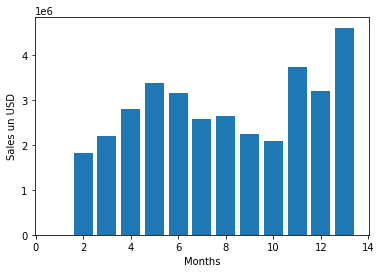

In [79]:
months = range(1,14)
result = df.groupby('Month').sum()

plt.bar(months, result['Sales'])
plt.ylabel('Sales un USD')
plt.xlabel('Months')
plt.show()

## What city sold the most product??

In [80]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00,23.90
1,NaN,NaN,NaN,NaN,NaT,NaN,0,NaT,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,11.99


In [81]:
df = df.dropna(axis=0)# getting rid of NaN values from dataset
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,09:27:00,11.99


In [82]:
# Add the "City" column and split the city 
# from Purchase address using lambda

def city(adress):
    return adress.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: city(x))
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00,99.99,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,09:27:00,11.99,Los Angeles


In [83]:
result2 = df.groupby('City').sum()
result2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602.0,2779908.20,104794,2795498.58
Austin,11153.0,1809873.61,69829,1819581.75
Boston,22528.0,3637409.77,141112,3661642.01
Dallas,16730.0,2752627.82,104620,2767975.40
Los Angeles,33289.0,5421435.23,208325,5452570.80
New York City,27932.0,4635370.83,175741,4664317.43
Portland,14053.0,2307747.47,87765,2320490.61
San Francisco,50239.0,8211461.74,315520,8262203.91
Seattle,16553.0,2733296.01,104941,2747755.48


### visualizing the result2

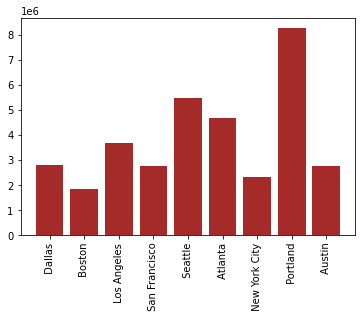

In [84]:
cities = df['City'].unique()

plt.bar(cities, result2['Sales'], color='brown')
plt.xticks(cities, rotation='vertical')
plt.show()
# this didnt match to the answer. True answer should be San Francisco

In [85]:
#There’s an issue between .unique() method and plt.bar(). 
#Their cities order are different. 
#we’re gonna syncronized the order by simply fixing the variable ‘cities’.

In [86]:
cities = df['City'].unique()
cities

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [87]:
cities = [i for i, df in df.groupby('City')]
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


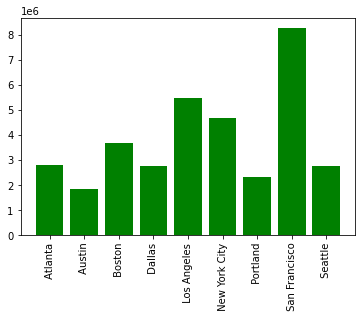

In [88]:
# So lets create bar plot now
cities = [i for i, df in df.groupby('City')]

plt.bar(cities, result2['Sales'], color='green')
plt.xticks(cities, rotation='vertical')
plt.show()

### At what time are the products ordered  most??

In [89]:
df.groupby('Time').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Time,,,,,,,,,
00:00:00,82,82,82,82,82,82,82,82,82
00:01:00,65,65,65,65,65,65,65,65,65
00:02:00,71,71,71,71,71,71,71,71,71
00:03:00,89,89,89,89,89,89,89,89,89
00:04:00,84,84,84,84,84,84,84,84,84
...,...,...,...,...,...,...,...,...,...
23:55:00,97,97,97,97,97,97,97,97,97
23:56:00,73,73,73,73,73,73,73,73,73
23:57:00,88,88,88,88,88,88,88,88,88


In [90]:
# changing our time into numbers
df['Hours'] = pd.to_datetime(df['Order Date']).dt.hour # adding a new column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Time,Sales,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,08:46:00,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22:30:00,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14:38:00,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,09:27:00,11.99,Los Angeles,9


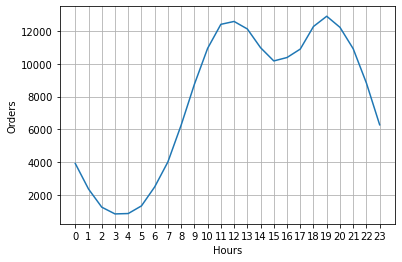

In [91]:
result3 = df.groupby(['Hours'])['Quantity Ordered'].count()
time = [i for i, df in df.groupby('Hours')]

plt.plot(time,result3)
plt.xticks(time)
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.grid()
plt.show()

Now we can see that the most beneficial time 
to play advertisement is before 11 AM and 19 PM


### Lets see what product sold most

In [93]:
prd = df.groupby('Product')


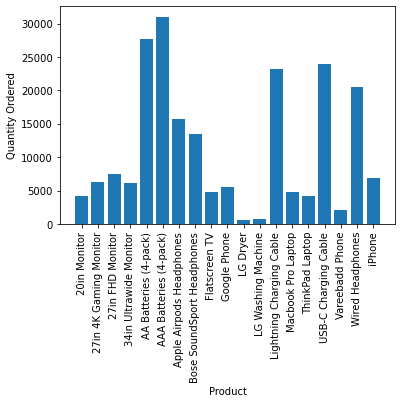

In [95]:
# lets visualize to understand our data^^


quant_order = prd.sum()['Quantity Ordered']

product = [i for i, df in prd]

plt.bar(product, quant_order)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(product, rotation='vertical')
plt.show()